<h1>1. Loading and preprocessing data</h1>

In [42]:
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import confusion_matrix, classification_report
iris_data=sns.load_dataset("iris") #loading the iris dataset

<h1>Getting peek in data</h1>

In [43]:
iris_data.head(5) #looking into first five instances

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
print(iris_data.species.value_counts()) #Getting counts of species in iris data

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


<h2>Transforming the labels/species column into numbers</h2>

In [45]:
le = LabelEncoder()
le.fit(iris_data['species'])
print(list(le.classes_))
iris_data['species'] = le.transform(iris_data['species'])

['setosa', 'versicolor', 'virginica']


In [46]:
print(iris_data['species'][0:5])
print(iris_data['species'][50:55])
print(iris_data['species'][100:105])

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32
50    1
51    1
52    1
53    1
54    1
Name: species, dtype: int32
100    2
101    2
102    2
103    2
104    2
Name: species, dtype: int32


In [47]:
iris_data.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


<h1>2. Applying k-Means Algorithm</h1>

In [48]:
# Converting numerical data into matrix 
iris_matrix = pd.DataFrame.to_numpy(iris_data[['sepal_length','sepal_width','petal_length','petal_width']])

<h2>Define the number of clusters k = 3 and create a new model</h2>

In [49]:
k=3
cluster_model = KMeans(n_clusters=k, random_state=10)

In [50]:
print(cluster_model)

KMeans(n_clusters=3, random_state=10)


<h2>Compute k-Means clustering</h2>

In [51]:
cluster_model.fit(iris_matrix)

KMeans(n_clusters=3, random_state=10)

In [52]:
cluster_model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [53]:
cluster_labels = cluster_model.fit_predict(iris_matrix)
kmeans=iris_data # assiging iris to kmeans variableb
kmeans.head(6)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0


<h2>Match the labels predicted by k-means with orignal labels to evaluate</h2>

In [54]:
kmeans['pred'] = cluster_labels #adding another column to predict label and assign it k-Means model
kmeans.head(6)

,sepal_length,sepal_width,petal_length,petal_width,species,pred
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
5,5.4,3.9,1.7,0.4,0,1


<h2>Displaying the clusters</h2>

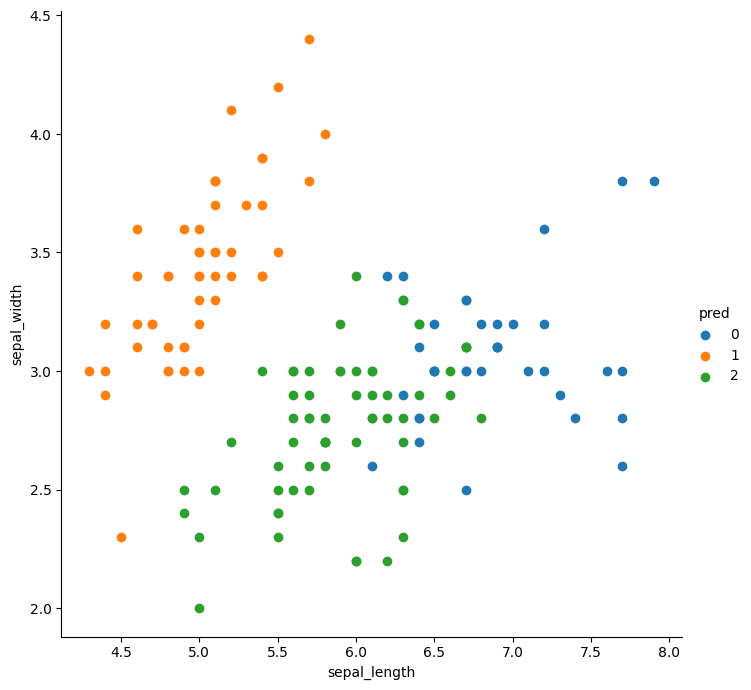

In [55]:
# Clusters predicted with k-Means
sns.FacetGrid(kmeans, hue="pred", height=7).map(plt.scatter, "sepal_length", "sepal_width").add_legend();

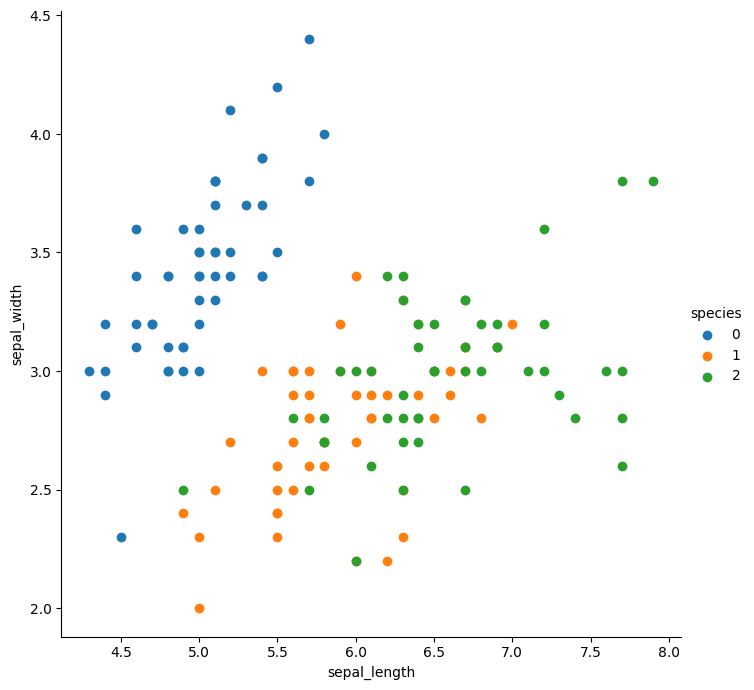

In [56]:
# Clusters without k-Means
sns.FacetGrid(iris_data, hue="species", height=7).map(plt.scatter, "sepal_length", "sepal_width").add_legend();

<h1>3. Visualizing centroids and checking the effect of 'k'</h1>

In [57]:
# Load Data
iris = load_iris()

# Create a dataframe
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['target'] = iris.target

In [58]:
X = iris.data

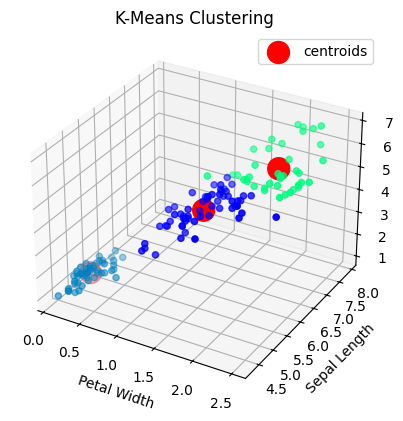

In [59]:
# Instantiate Kmeans, change the values of 'K' to observe change in clusters and centroids
K = 3
km = KMeans(K)
clusts = km.fit_predict(X)

#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(km.cluster_centers_[:, 3],
            km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 2],
            s = 250,
            marker='o',
            c='red',
            label='centroids')
scatter = ax.scatter(df['petal width (cm)'],df['sepal length (cm)'], df['petal length (cm)'],
                     c=clusts,s=20, cmap='winter')


ax.set_title('K-Means Clustering')
ax.set_xlabel('Petal Width')
ax.set_ylabel('Sepal Length')
ax.set_zlabel('Petal Length')
ax.legend()
plt.show()

<h1>4. Evaluation</h1>

<h2>Computing accuracy score</h2>

In [60]:
# Performance Metrics
sm.accuracy_score(iris_data.species, cluster_model.labels_)

0.09333333333333334

<h2>Confusion Matrix</h2>

In [61]:
# Confusion Matrix
pd.crosstab(iris_data.species, cluster_model.labels_)

col_0,0,1,2
species,,,
0,0,50,0
1,3,0,47
2,36,0,14


<h2>Computing precision, recall and f1-score</h2>

In [62]:
print(classification_report(iris_data.species, cluster_model.labels_))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.00      0.00      0.00        50
           2       0.23      0.28      0.25        50

    accuracy                           0.09       150
   macro avg       0.08      0.09      0.08       150
weighted avg       0.08      0.09      0.08       150



<h2>Comparing k-Means with orignal dataset labels using box plots</h2><br>
<h2>Checking sepal length</h2>

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12244\2129031995.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y="sepal_length", data=iris_data, palette='hls'); #boxplot with simple iris labels


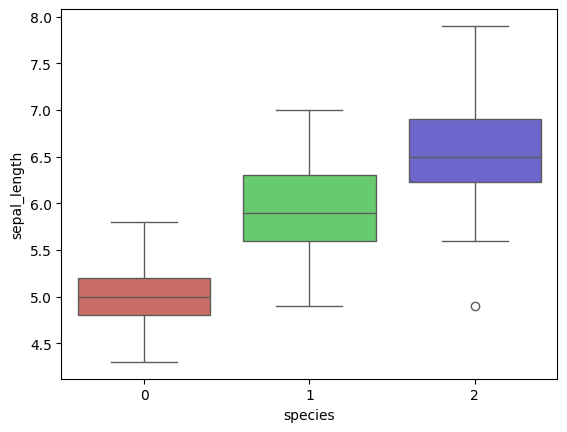

In [63]:
sns.boxplot(x="species", y="sepal_length", data=iris_data, palette='hls'); #boxplot with simple iris labels

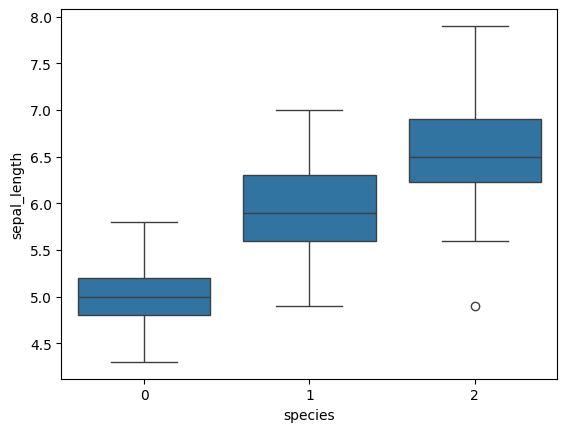

In [64]:
sns.boxplot(x="species", y="sepal_length", data=kmeans); #cluster label by kmeans

<h2>Checking sepal width</h2>

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12244\3075336647.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y="sepal_width", data=iris_data, palette='hls'); #iris data


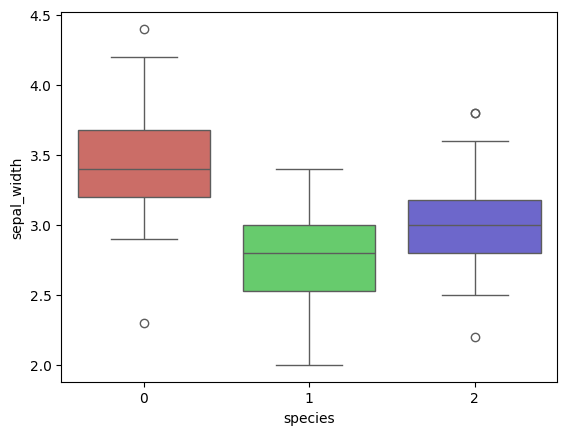

In [65]:
sns.boxplot(x="species", y="sepal_width", data=iris_data, palette='hls'); #iris data

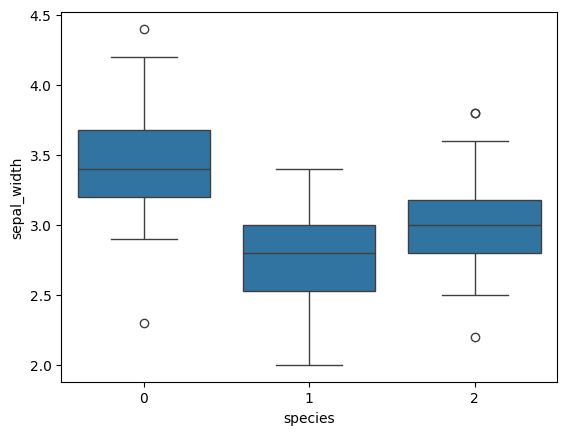

In [66]:
sns.boxplot(x="species", y="sepal_width", data=kmeans); #kmeans

<h2>Checking Petal length</h2>

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12244\1779679510.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y="petal_length", data=iris_data, palette='hls'); #iris data


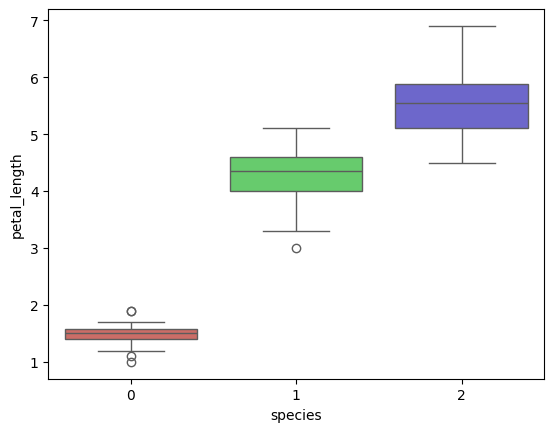

In [67]:
sns.boxplot(x="species", y="petal_length", data=iris_data, palette='hls'); #iris data

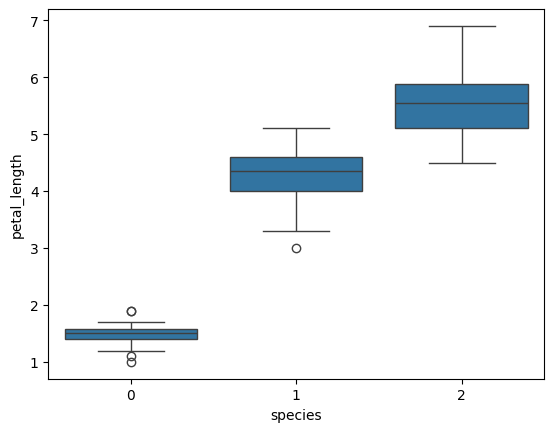

In [68]:
sns.boxplot(x="species", y="petal_length", data=kmeans); #kmeans

<h2>Checking Petal width</h2>

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12244\2312596805.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="species", y="petal_width", data=iris_data, palette='hls'); #iris data


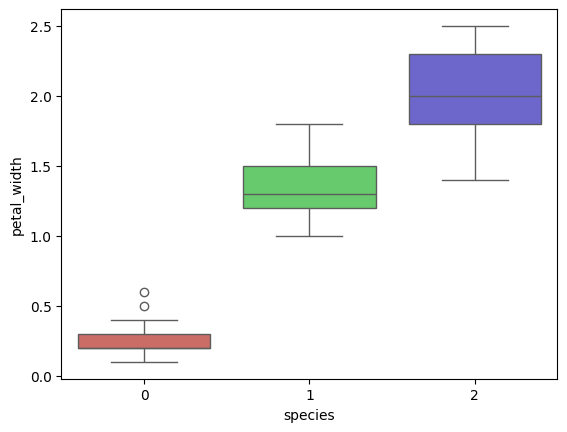

In [69]:
sns.boxplot(x="species", y="petal_width", data=iris_data, palette='hls'); #iris data

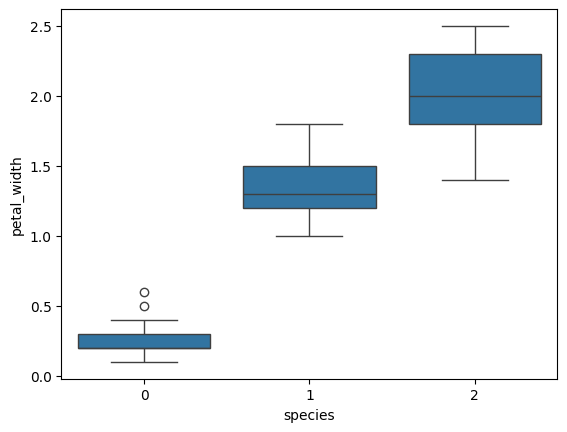

In [70]:
sns.boxplot(x="species", y="petal_width", data=kmeans); #iris data

<h2>Some Challenges:
The globally optimal result may not be achieved

The number of clusters must be selected beforehand

k-means is limited to linear cluster boundaries

k-means can be slow for large numbers of samples

5. How to select the best k - silhouettes
Silhouette Analysis
silhouette score=p−q / max(p,q)
p is the mean distance to the points in the nearest cluster that the data point is not a part of

q is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.</h2>

In [71]:
from __future__ import print_function
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from sklearn import metrics
from sklearn.metrics import pairwise_distances

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.6810461692117462
For n_clusters = 3 The average silhouette_score is : 0.551191604619592
For n_clusters = 4 The average silhouette_score is : 0.49535632852884987
For n_clusters = 5 The average silhouette_score is : 0.4898982472843944
For n_clusters = 6 The average silhouette_score is : 0.4771175005821336


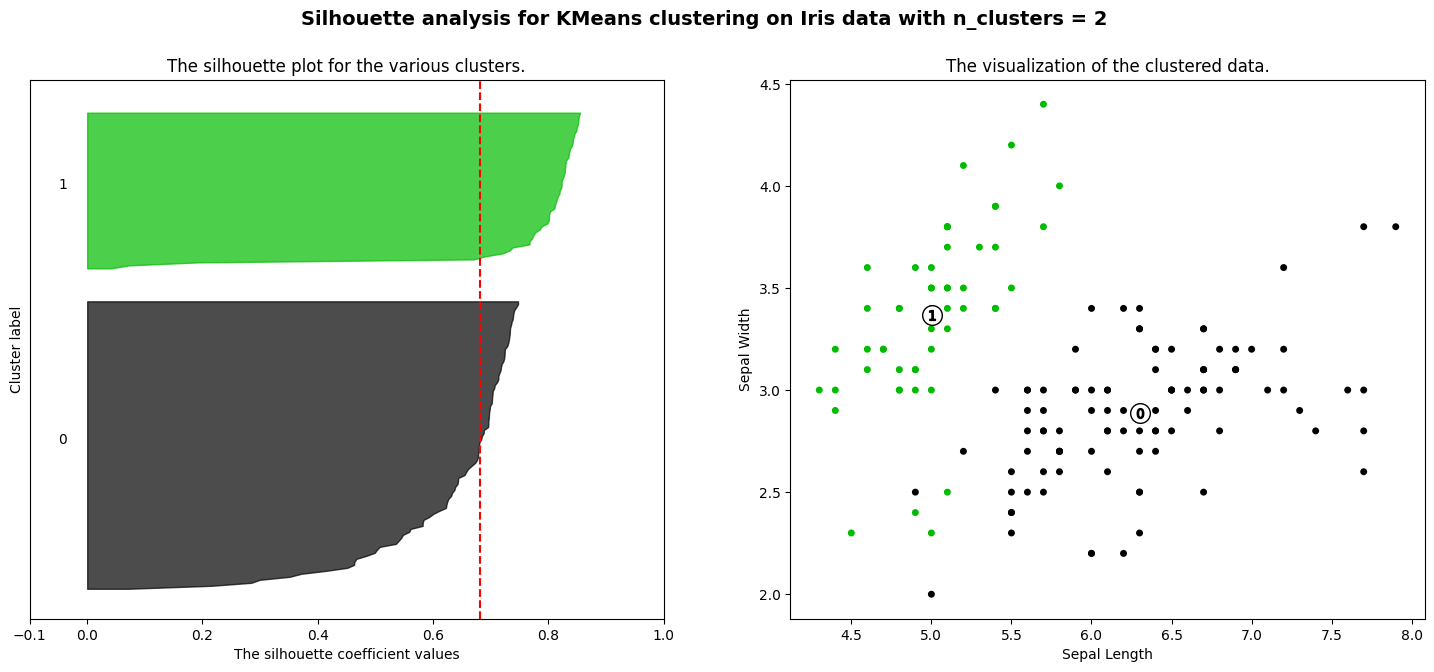

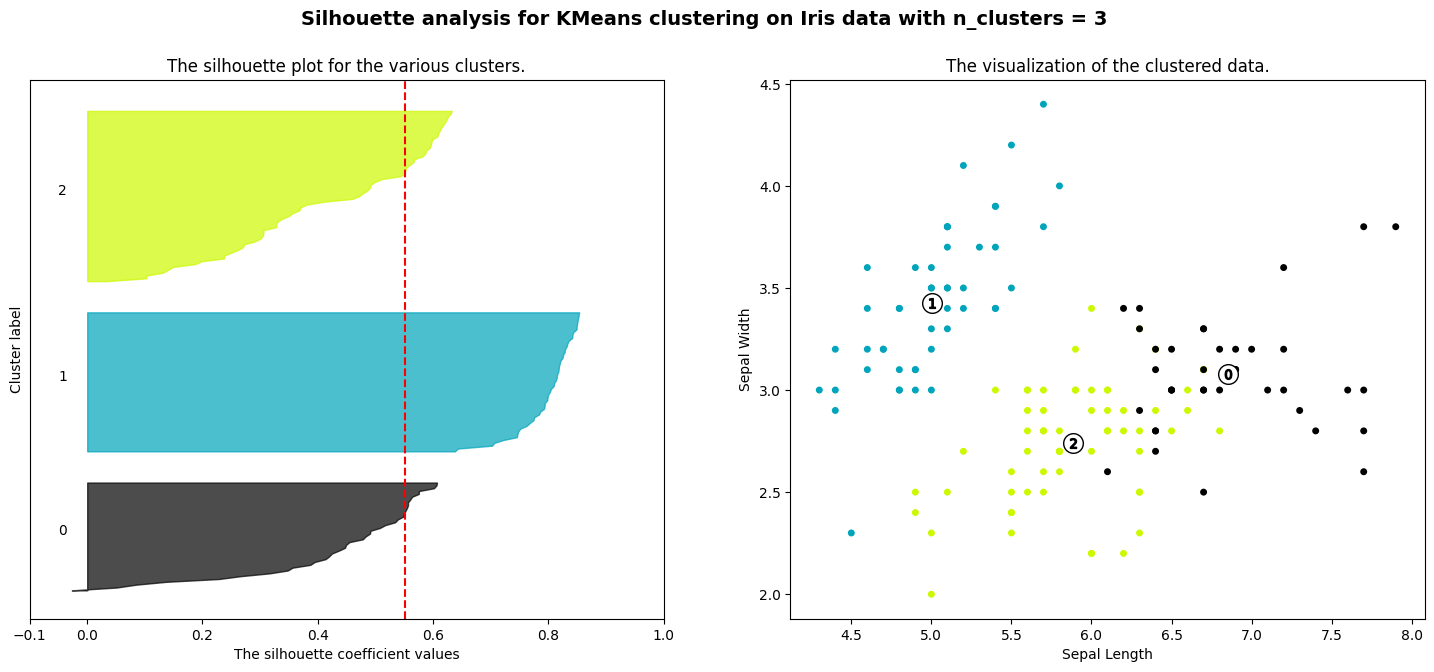

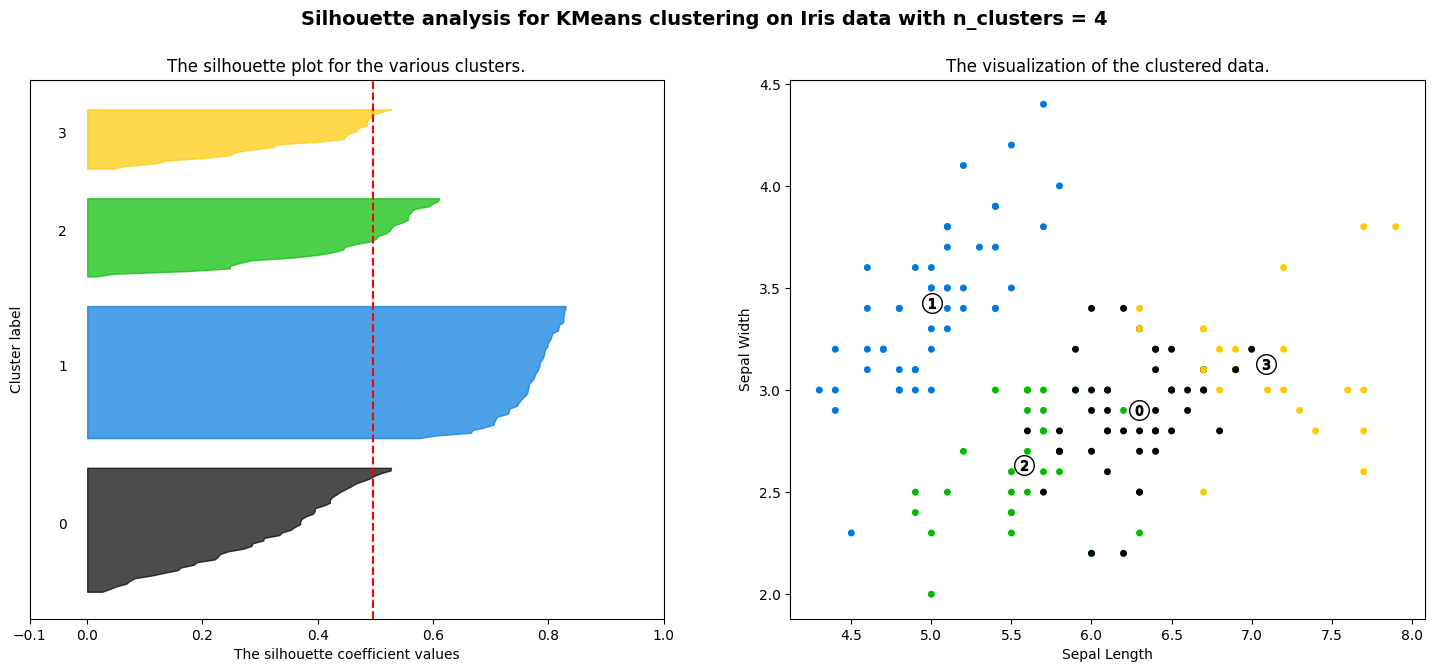

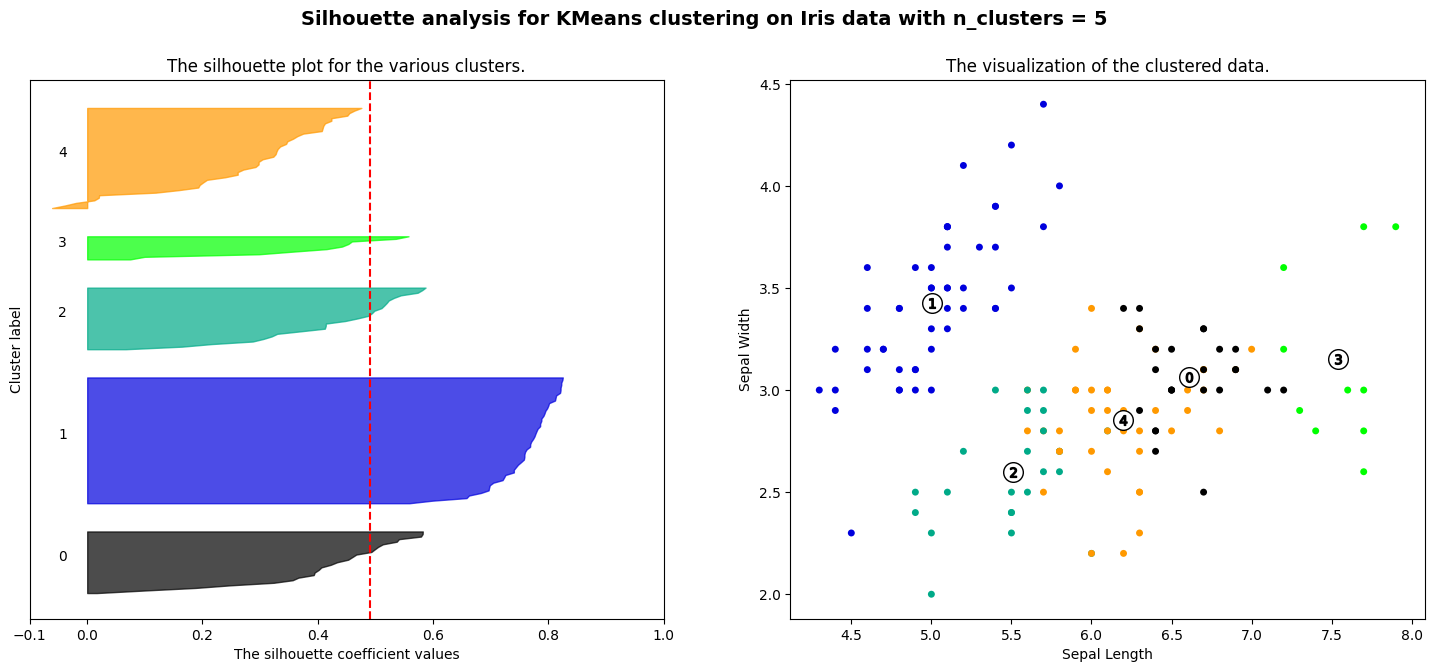

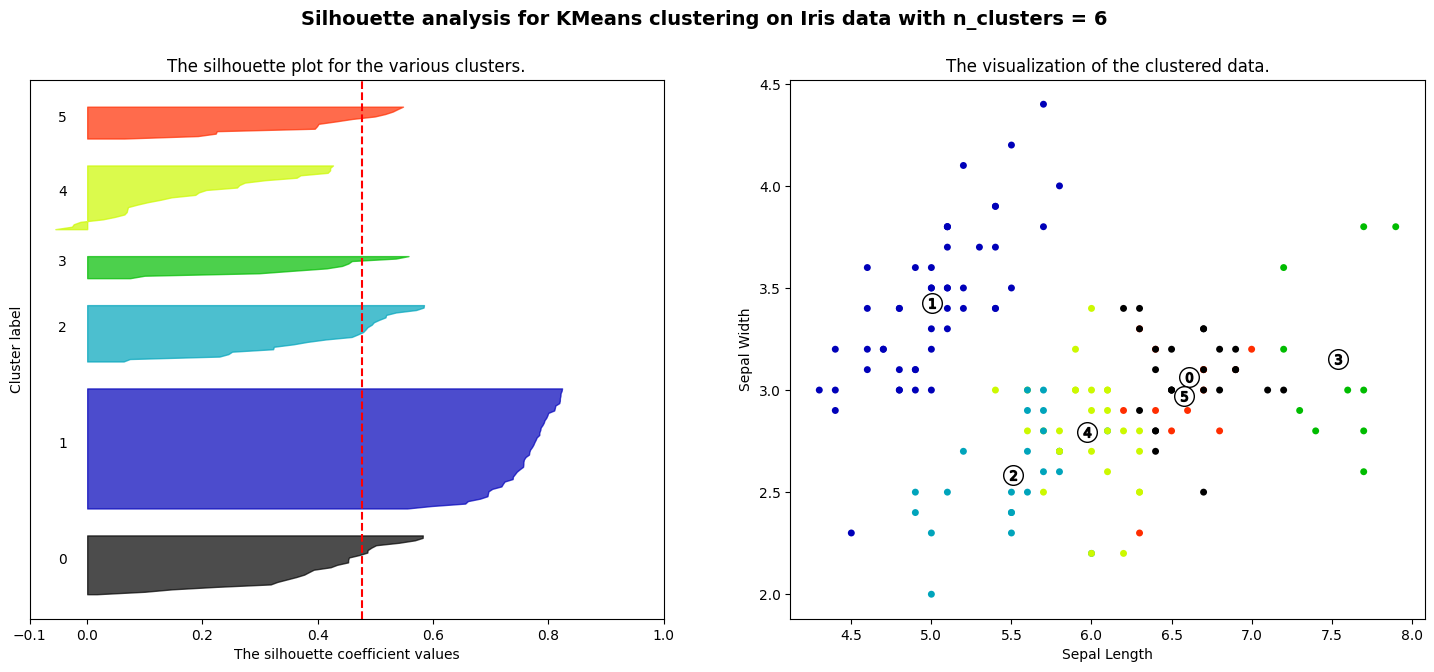

In [72]:
dataset = datasets.load_iris()

print(__doc__)


X = dataset.data
y = dataset.target# For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=100, lw=0, alpha=1,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Sepal Length")
    ax2.set_ylabel("Sepal Width")

    plt.suptitle(("Silhouette analysis for KMeans clustering on Iris data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()